In [1]:
import operator
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter
pd.set_option('display.float_format', lambda x: '%.3f' % x)

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

In [2]:
data = pd.read_csv('./Prosper data/loan.txt', sep="|")
data = data.drop(labels='Unnamed: 15', axis=1)
features = [column for column in data.columns]
n = len(data)

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print ("Dataset dimension: {0}".format(data.shape))
print ("Dataset contains {0} records.".format(n))
print ("Dataset contains {0} features: {1}.".format(len(features), features))

Dataset dimension: (51700, 15)
Dataset contains 51700 records.
Dataset contains 15 features: ['AgeInMonths', 'AmountBorrowed', 'BorrowerRate', 'CreationDate', 'CreditGrade', 'ProsperRating', 'DebtToIncomeRatio', 'GroupKey', 'Lon_Key', 'LenderRate', 'ListingKey', 'OriginationDate', 'Status', 'Term', 'ModifiedDate'].


## Loan Object Description

<table border="0" cellspacing="0" cellpadding="4" style="font-family:Verdana;font-size:11px">
<tbody><tr style="background-color:#E3E1CA">
<th>Name</th>
<th>Label</th>
<th>Type</th>
<th>Description</th>
</tr>
<tr>
<td><b>ActiveProsperLoans</b></td>
<td>Active Prosper Loans</td>
<td>integer</td>
<td>Total number of active Prosper loans at the time of listing creation.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>AmountFunded</b></td>
<td>Amount Funded</td>
<td>decimal</td>
<td>The monetary amount of the listing which has been funded.</td>
</tr>
<tr>
<td><b>AmountRemaining</b></td>
<td>Amount Remaining</td>
<td>decimal</td>
<td>The monetary amount of the listing which still remains to be funded.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>AmountRequested</b></td>
<td>Amount Requested</td>
<td>decimal</td>
<td>The amount that the member requested to borrow in the listing.</td>
</tr>
<tr>
<td><b>AvailableBankcardCredit</b></td>
<td>Available Bankcard Credit</td>
<td>decimal</td>
<td>Total available credit via bank card.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>BankDraftFeeAnnualRate</b></td>
<td>Bank Draft Fee Annual Rate</td>
<td>decimal</td>
<td>The rate charged by the Bank when they Payment Option selected is not Electronic Funds Transfer</td>
</tr>
<tr>
<td><b>BidCount</b></td>
<td>Bid Count</td>
<td>integer</td>
<td>The total number of Bids on this listing.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>BidMaximumRate</b></td>
<td>Maximum Rate To Bid</td>
<td>decimal</td>
<td>The Maximum Rate in which a bidder will be able to lend money in order to create a winning bid. This rate is less than or equal to Current Rate based on market conditions.</td>
</tr>
<tr>
<td><b>BorrowerCity</b></td>
<td>Borrower City</td>
<td>string</td>
<td>The city of the address of the borrower at the time the listing was created.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>BorrowerMaximumRate</b></td>
<td>Maximum Rate</td>
<td>decimal</td>
<td>The Maximum interest rate the borrower is willing to pay when the listing was created.</td>
</tr>
<tr>
<td><b>BorrowerRate</b></td>
<td>Borrower Rate</td>
<td>decimal</td>
<td>The is the rate the borrower pays if the loan were to close at this point in time. The rate is computed as the LenderRate + GroupLeaderRewardRate (if applicable) + BankDraftFeeAnnualRate (if applicable).</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>BorrowerState</b></td>
<td>Borrower State</td>
<td>string</td>
<td>The two letter abbreviation of the state (in the United States, or military state) of the address of the borrower at the time the Listing was created.</td>
</tr>
<tr>
<td><b>Category</b></td>
<td>Category</td>
<td>integer</td>
<td>
The Category of this Listing. The Category is one of the following numerical values:<br>
<b>0</b> Not available<br>
<b>1</b> Debt consolidation<br>
<b>2</b> Home improvement<br>
<b>3</b> Business<br>
<b>4</b> Personal loan<br>
<b>5</b> Student use<br>
<b>6</b> Auto<br>
<b>7</b> Other<br>
<b>8</b> Baby &amp; Adoption Loans<br>
<b>9</b> Boat<br>
<b>10</b> Cosmetic Procedures<br>
<b>11</b> Engagement Ring Financing<br>
<b>12</b> Green Loans<br>
<b>13</b> Household Expenses<br>
<b>14</b> Large Purchases<br>
<b>15</b> Medical/Dental<br>
<b>16</b> Motorcycle<br>
<b>17</b> RV<br>
<b>18</b> Taxes<br>
<b>19</b> Vacation<br>
<b>20</b> Wedding Loans<br>
</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>CreationDate</b></td>
<td>Creation Date</td>
<td>datetime</td>
<td>The date the listing was created.</td>
</tr>
<tr>
<td><b>CreditGrade</b></td>
<td>Credit Grade</td>
<td>string</td>
<td>Credit Grade of the borrower at the time the listing was created.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>CreditScoreRangeLower</b></td>
<td>Credit Score Range Lower Bound</td>
<td>integer</td>
<td>The lower value representing the range of the borrower’s credit score as provided by a consumer credit rating agency in a recent credit inquiry.</td>
</tr>
<tr>
<td><b>CreditScoreRangeUpper</b></td>
<td>Credit Score Range Upper Bound</td>
<td>integer</td>
<td>The upper value representing the range of the borrower’s credit score as provided by a consumer credit rating agency in a recent credit inquiry.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>DebtToIncomeRatio</b></td>
<td>Debt to Income Ratio</td>
<td>decimal</td>
<td>The debt to income ratio of the borrower at the time the listing was created. This value is null if the debt to income ratio is not available. This value is capped at 10.01 (so any actual debt to income ratio larger than 1000% will be returned as 1001%).</td>
</tr>
<tr>
<td><b>Description</b></td>
<td>Description</td>
<td>string</td>
<td>The description about the Listing that the Member writes when creating the Listing.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Duration</b></td>
<td>Duration</td>
<td>integer</td>
<td>The number of days in which the listing is valid for.</td>
</tr>
<tr>
<td><b>EffectiveYield</b></td>
<td>Effective Yield</td>
<td>decimal</td>
<td>Effective yield is equal to the borrower interest rate: (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>EndDate</b></td>
<td>End Date</td>
<td>datetime</td>
<td>The date when the listing ends</td>
</tr>
<tr>
<td><b>EstimatedLoss</b></td>
<td>Estimated Loss</td>
<td>decimal</td>
<td>Estimated annualized loss rate on the loan.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>EstimatedReturn</b></td>
<td>Estimated Return</td>
<td>decimal</td>
<td>Estimated annualized return on the loan.</td>
</tr>
<tr>
<td><b>FundingOption</b></td>
<td>Funding Option</td>
<td>string</td>
<td>
The Funding Options is one of the following values:<br>
Open For Duration - The listing is open for it's duration.<br>
Close When Funded - The listing will close as soon as it is funded 100%.<br>
</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>GroupKey</b></td>
<td>Group Key</td>
<td>string</td>
<td>The Key of the Group in which the member is a member of. See the Group Object for more details.</td>
</tr>
<tr>
<td><b>GroupLeaderRewardRate</b></td>
<td>Group Leader Reward Rate</td>
<td>decimal</td>
<td>The portion of the Borrower Rate which will be paid to the Group Leader.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>HasVerifiedBankAccount</b></td>
<td>Has Verified Bank Account</td>
<td>boolean</td>
<td>Specifies whether or not the member has a verified Bank Account at the time the listing was created. DEPRECATED -- this field may be removed in the future and always has the value true in the current release.</td>
</tr>
<tr>
<td><b>Images</b></td>
<td>Images</td>
<td>xml</td>
<td>These are the captions and URLs to the images that Member has uploaded to describe the listing. These are stored as Name/Value Pairs in XML.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>IsBorrowerHomeowner</b></td>
<td>Is Borrower a Homeowner</td>
<td>boolean</td>
<td>Specifies whether or not the member has is a verified Homeowner at the time the listing was created.</td>
</tr>
<tr>
<td><b>Key</b></td>
<td>Key</td>
<td>string</td>
<td>The primary key identifier for the Listing Object. All Listings have a unique Key.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>LenderRate</b></td>
<td>Lender Rate</td>
<td>decimal</td>
<td>The rate that lenders would receive on the listing if the loan were to close at this point in time.</td>
</tr>
<tr>
<td><b>LenderYield</b></td>
<td>Lender Yield</td>
<td>decimal</td>
<td>The interest rate the lender receives on the loan.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>ListingNumber</b></td>
<td>Listing Number</td>
<td>integer</td>
<td>The number that uniquely identifies the listing to the public as displayed on the website.</td>
</tr>
<tr>
<td><b>MemberKey</b></td>
<td>Member Key</td>
<td>string</td>
<td>The Key of the member who creating the Listing. See the Member Object for more information.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>MonthlyLoanPayment</b></td>
<td>Monthly Loan Payment</td>
<td>decimal</td>
<td>The monthly payment made by the borrower.</td>
</tr>
<tr>
<td><b>OnTimeProsperPayments</b></td>
<td>Ontime Prosper Payments</td>
<td>integer</td>
<td>Number of Prosper payments paid on time.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>PercentFunded</b></td>
<td>Percent Funded</td>
<td>decimal</td>
<td>The percentage amount of the loan which has been funded. This can also be calculated as (Remaining / Amount)</td>
</tr>
<tr>
<td><b>ProsperPaymentsLessThanOneMonthLate</b></td>
<td>Payments &lt;31 days late</td>
<td>integer</td>
<td>Number of Prosper payments less than 31 days late.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>ProsperPaymentsOneMonthPlusLate</b></td>
<td>Prosper Payments One Month Plus Late</td>
<td>integer</td>
<td>Number of Prosper payments 31+ days late.</td>
</tr>
<tr>
<td><b>ProsperPrincipalBorrowed</b></td>
<td>Prosper Principal Borrowed</td>
<td>decimal</td>
<td>Total principal borrowed from Prosper prior to listing creation.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>ProsperPrincipalOutstanding</b></td>
<td>Prosper Principal Outstanding</td>
<td>decimal</td>
<td>Prosper principal balance outstanding at the time of listing creation.</td>
</tr>
<tr>
<td><b>ProsperScore</b></td>
<td>Prosper Score</td>
<td>integer</td>
<td>A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>StartDate</b></td>
<td>Start Date</td>
<td>datetime</td>
<td>The starting time of the Listing.</td>
</tr>
<tr>
<td><b>Status</b></td>
<td>Status</td>
<td>string</td>
<td>
The status of the Listing is one of the following values:<br>
<b>Active</b> - The listing is current active in the marketplace<br>
<b>Withdrawn</b> - The listing was withdrawn by customer request<br>
<b>Expired</b> - The listing failed to fund in time<br>
<b>Completed</b> - The listing ran to completion and funded<br>
<b>Cancelled</b> - The listing was canceled by Prosper<br>
<b>Pending Verification</b> - The listing ran to completion but is awaiting additional bank or identity verification<br>
</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Term</b></td>
<td>Term</td>
<td>integer</td>
<td>The length of the loan in months.</td>
</tr>
<tr>
<td><b>Title</b></td>
<td>Title</td>
<td>string</td>
<td>The title of the Listing. The member assigns this text when creating the listing.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>TotalInquiries</b></td>
<td>Total Inquiries</td>
<td>integer</td>
<td>Total number of inquiries made.</td>
</tr>
<tr>
<td><b>TotalProsperLoans</b></td>
<td>Total Prosper Loans</td>
<td>integer</td>
<td>Total number of Prosper loans prior to listing creation.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>TotalProsperPaymentsBilled</b></td>
<td>Total Prosper Payments Billed</td>
<td>integer</td>
<td>Total Prosper payments billed prior to listing creation.</td>
</tr>
<tr>
<td><b>TradesOpenedLast6Months</b></td>
<td>Trades Opened Last 6 Months</td>
<td>integer</td>
<td>Total number of trades opened in the last 6 months.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>TradesOpenedLast6Months</b></td>
<td>Trades Opened Last 6 Months</td>
<td>integer</td>
<td>Total number of trades opened in the last 6 months.</td>
</tr>
<tr>
<td><b>TradesOpenedLast6Months</b></td>
<td>Trades Opened Last 6 Months</td>
<td>integer</td>
<td>Total number of trades opened in the last 6 months.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>VerificationStage</b></td>
<td>VerificationStage</td>
<td>integer</td>
<td>A three-stage indicator of the process on the Prosper loan, based on Prosper’s verification of the borrower’s information and documents submitted that are key to evaluating the loan. The further along in verification, the higher the Verification Stage and the more likely the loan will originate.</td>
</tr>
</tbody></table>

## Sample Data

In [4]:
data.head()

,AgeInMonths,AmountBorrowed,BorrowerRate,CreationDate,CreditGrade,ProsperRating,DebtToIncomeRatio,GroupKey,Lon_Key,LenderRate,ListingKey,OriginationDate,Status,Term,ModifiedDate
0,76,1000.000,0.040,2005-11-10 18:44:14,AA,NaN,0.233,B8143364846229046768A83,30FD3365652573455326F15,0.040,D21A33647075665665BE266,2005-11-15 00:00:00,Paid,36,2010-04-30 20:44:00
1,76,1500.000,0.059,2005-11-29 08:42:32,AA,NaN,0.017,NaN,5FEA3365823284105CDF615,0.059,97B333660731451030726AF,2005-11-30 00:00:00,Paid,36,2010-04-30 20:44:00
2,76,1000.000,0.043,2005-11-22 16:07:48,AA,NaN,0.041,NaN,C29A3366376042420E5D6F4,0.043,B3083364738592238DBDA63,2005-11-23 00:00:00,Paid,36,2010-04-30 20:44:00
3,76,1000.000,0.170,2005-11-17 15:05:28,E,NaN,0.018,5BE63365249159793785758,81EF336558129564212843B,0.120,2F25336514614362295DA03,2005-11-18 00:00:00,Paid,36,2010-04-30 20:44:00
4,76,1000.000,0.120,2005-11-25 13:40:29,B,NaN,0.011,NaN,979E3364988299845A2A448,0.120,B87F3364623805558A45EAB,2005-11-28 00:00:00,Paid,36,2010-04-30 20:44:00


## Summary Statistics

In [5]:
data.describe()

,AgeInMonths,AmountBorrowed,BorrowerRate,DebtToIncomeRatio,LenderRate,Term
count,51700.000,51700.000,51700.000,47788.000,51700.000,51700.000
mean,35.581,6149.453,0.200,0.291,0.198,36.601
std,22.971,5109.058,0.082,0.752,0.082,5.427
min,0.000,1000.000,0.000,0.000,0.000,12.000
25%,11.000,2550.000,0.133,0.120,0.130,36.000
50%,44.000,4700.000,0.190,0.200,0.190,36.000
75%,56.000,7600.000,0.270,0.300,0.267,36.000
max,76.000,25000.000,0.497,10.010,0.497,60.000


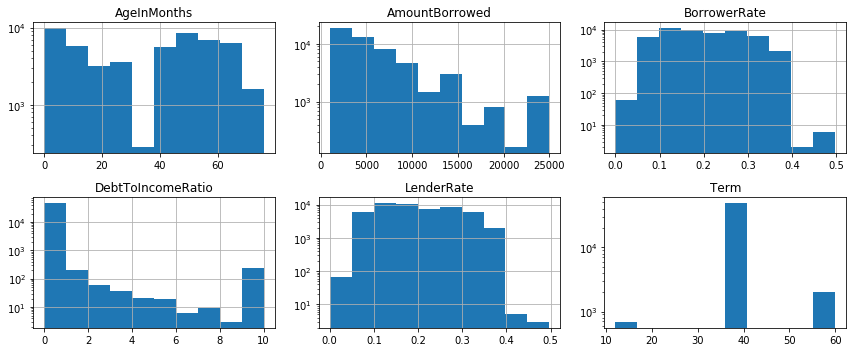

In [6]:
data[list(data.describe().columns)].hist(figsize=(12,5), layout=(2,3), log=True)
plt.grid()
plt.tight_layout()
plt.show()